<a href="https://colab.research.google.com/github/diamantidisgeorgios/exercise4/blob/main/exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 1**

#Import Libraries

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

#Load dataset

In [59]:
df = pd.read_csv('wine-missing.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#Describe features

In [60]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Fixed acidity** measures the natural acids that are not removed by evaporation and has 6487 values out of 6497 with a mean of about 7 and std of about 1.3. The minimum value is 3.8 and the maximum 15.9.

**Volatile acidity** measures the concentration of volatile acids and has 6489 values out of 6497 with a mean of about 0.3 and std of about 0.16. The minimum value is 0.8 and the maximum 1.58.

**Citric acid** measures the citric acid that is in a wine and has 6494 values out of 6497 with a mean of about 0.3 and std of about 0.14. The minimum value is 0 and the maximum 1.66. The minimum value of citric acid can be problematic because in the process of winemaking there are always some citric acid produced. That means that either more values are missing (or typed incorrectly), or the citric acid feature has a different meaning, like the citric acid added to the wine.

**Residual sugar** measures the unfermented sugar in the finished wine and has 6495 values out of 6497 with a mean of about 5.4 and std of about 4.7. The minimum value is 0.6 and the maximum 65.8.

**Chlorides**  measure the mineral ions that are in the wine and have 6495 values out of 6497 with a mean of about 0.056 and std of about 0.03. The minimum value is 0.009 and the maximum 0.611.

**Free sulfur dioxide** measures the sulfur dioxide that helps protect the wine against oxidation and has no missing values, with a mean of about 30.5 and std of about 17.7. The minimum value is 1 and the maximum 289.

**Total sulfur dioxide** measure the total number of sulfur dioxide in the wine and has no missing values, with a mean of about 115 and std of about 56.5. The minimum value is 6 and the maximum 440.

**Density** measures the gravity of the wine and has no missing values, with a mean of about 1 and std of about 0.003. The minimum value is 0.987110 and the maximum 1.038980.

**pH** measures the acidity of the wine and has 6488 values out of 6497 with a mean of about 3.2 and std of about 0.16. The minimum value is 2.72 and the maximum 4.01.

**Sulphates** measure the sulphates that are found in the wine and have 6493 values out of 6497 with a mean of about 0.5 and std of about 0.15. The minimum value is 0.22 and the maximum 2.

**Alcohol** measures the percentage of alcohol in the wine and has no missing values, with a mean of about 10.5 and std of about 1.2. The minimum value is 8 and the maximum 14.9.

**Quality** is a given score of 0-10 to show the quality of wine and has no missing values, with a mean of about 5.8 and std of about 0.87. The minimum value is 3 and the maximum 9.

#Plot variables

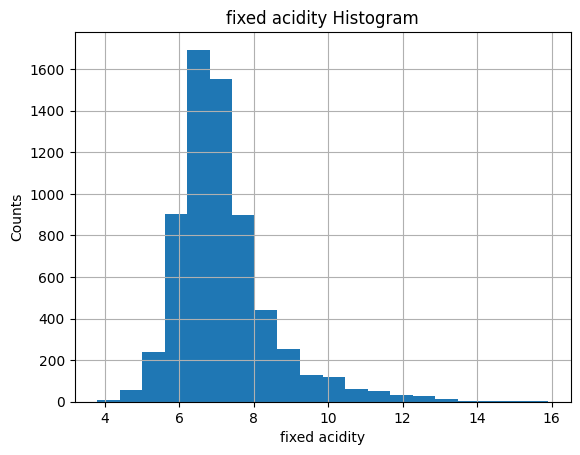

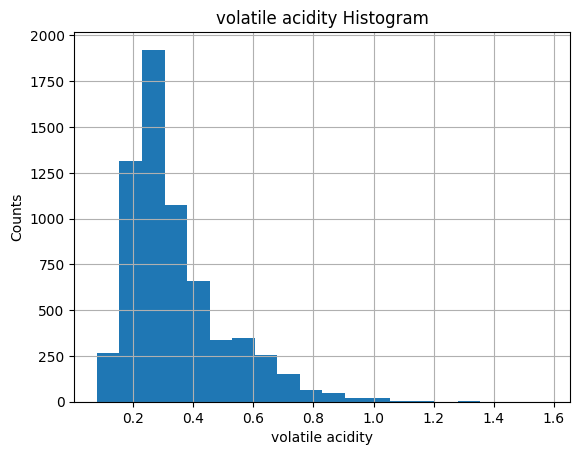

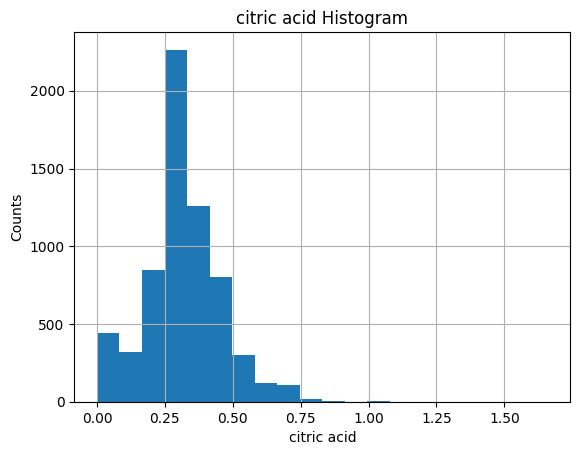

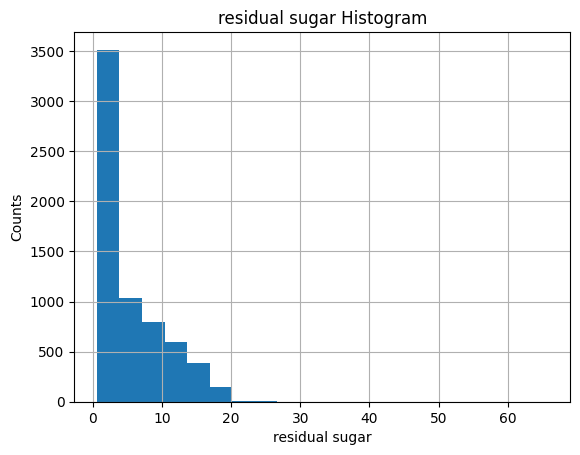

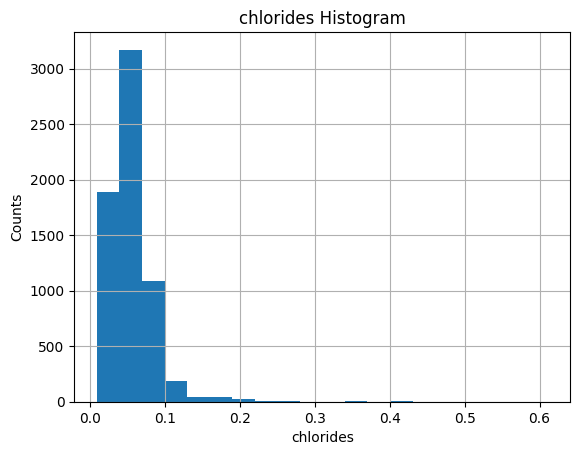

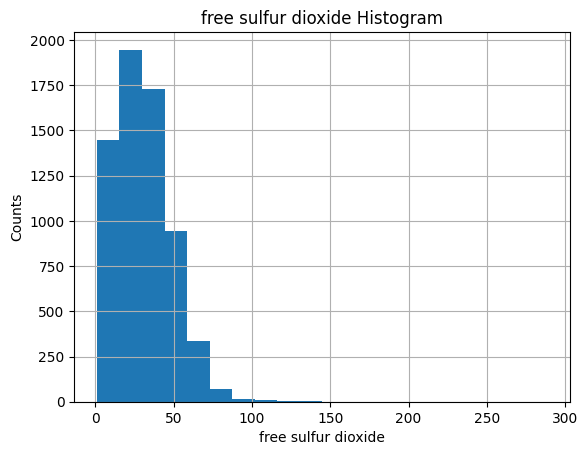

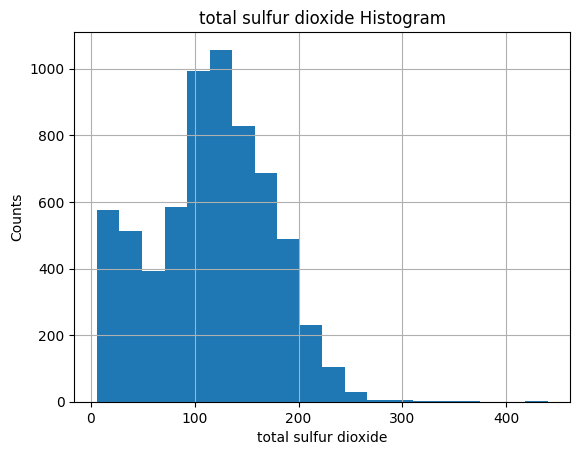

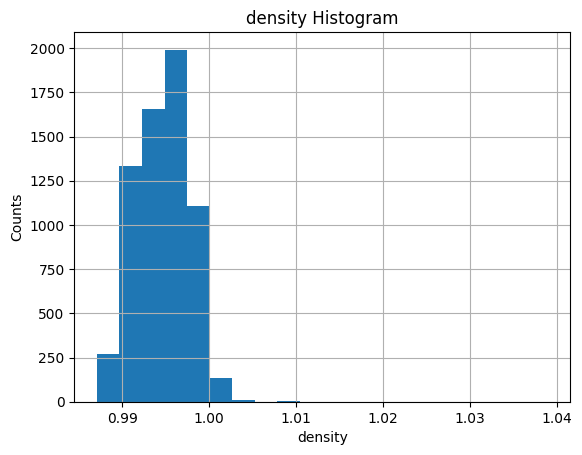

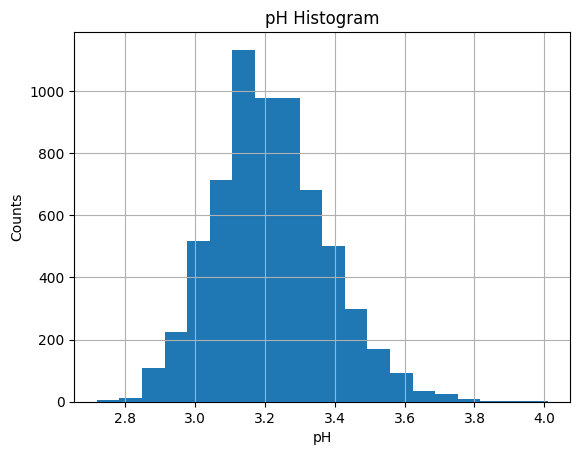

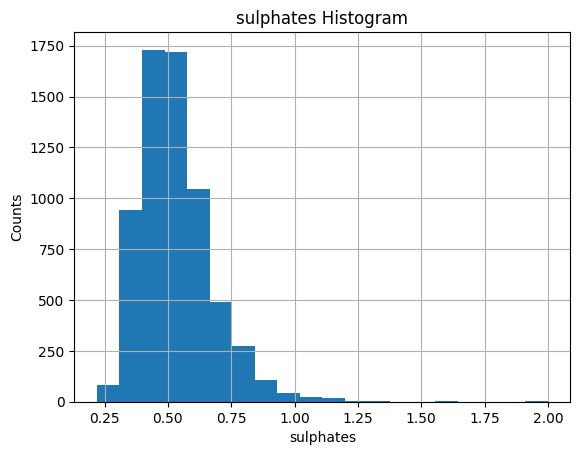

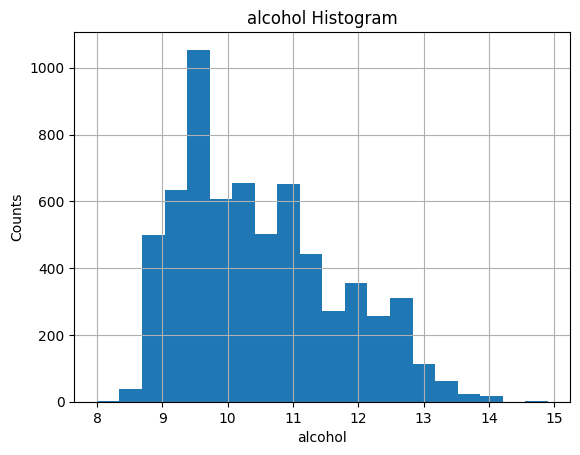

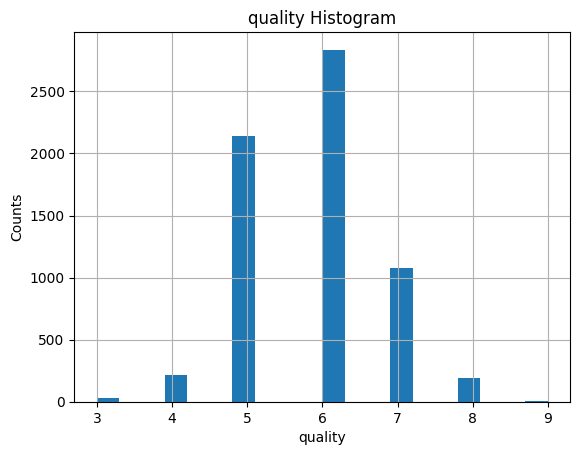

In [61]:
#Plot features histogram
for i in df.columns.drop('type'):
  plt.hist(df[i], bins=20)
  plt.title(f'{i} Histogram')
  plt.xlabel(f'{i}')
  plt.ylabel('Counts')
  plt.grid()
  plt.show()


#Plot class

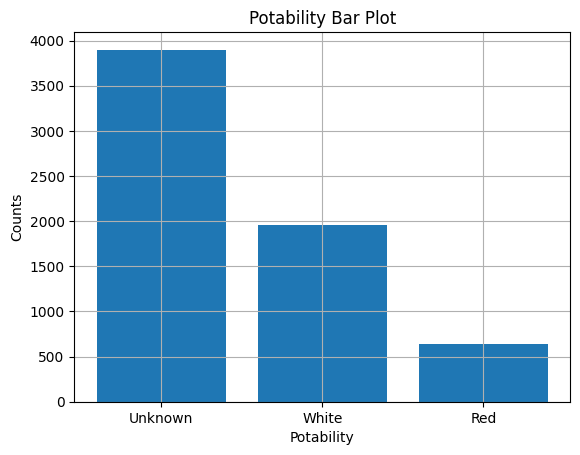

In [62]:
#Plot type of wine in a bar plot
plt.bar(['Unknown', 'White','Red'], df.type.value_counts(), data=df['type'])
plt.title('Potability Bar Plot')
plt.xlabel('Potability')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [63]:
df.type.value_counts()

,count
type,
unknown,3898
white,1959
red,640


#Change type to numeric

In [64]:
df['type'] = df['type'].map({'white': 0, 'red': 1, 'unknown':2})

In [65]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#Convert dataframe to numpy arrays

In [66]:
input_df = df.drop(columns=['type'])
targets_df = df['type']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((6497, 12), (6497,))

In [67]:
x

array([[ 7.   ,  0.27 ,  0.36 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  6.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

#Split known unknow type

In [68]:
x_known = []
y_known = []
x_unknown = []

for i in range(0, y.shape[0]):
  if y[i] != 2:
    x_known.append(x[i])
    y_known.append(y[i])
  else:
    x_unknown.append(x[i])

x_known = np.array(x_known)
y_known = np.array(y_known)
x_unknown = np.array(x_unknown)

#Split to train-split

In [69]:
seed = 42
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size=test_size, random_state=seed, stratify=y_known)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1819, 12), (1819,), (780, 12), (780,))

#Create a random forest model

In [70]:
model = RandomForestClassifier(random_state=seed)

#Train model on training set

In [71]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

#Evaluate Model on test and train set

###Prediction and metrics on train set

In [72]:
y_pred = model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred)
accuracy_percentage = round(accuracy*100, 2)

f1 = f1_score(y_train, y_pred)
f1_percentage = round(f1*100, 2)

precision = precision_score(y_train, y_pred)
precision_percentage = round(precision*100, 2)

recall = recall_score(y_train, y_pred)
recall_percentage = round(recall*100, 2)

print(f'The accuracy of the model on the train set is: {accuracy_percentage}')
print(f'The f1 score of the model on the train set is: {f1_percentage}')
print(f'The precision of the model on the train set is: {precision_percentage}')
print(f'The recall of the model on the train set is: {recall_percentage}')

The accuracy of the model on the train set is: 99.95
The f1 score of the model on the train set is: 99.89
The precision of the model on the train set is: 99.78
The recall of the model on the train set is: 100.0


###Prediction and metrics on train set

In [73]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

f1 = f1_score(y_test, y_pred)
f1_percentage = round(f1*100, 2)

precision = precision_score(y_test, y_pred)
precision_percentage = round(precision*100, 2)

recall = recall_score(y_test, y_pred)
recall_percentage = round(recall*100, 2)

print(f'The accuracy of the model on the train set is: {accuracy_percentage}')
print(f'The f1 score of the model on the train set is: {f1_percentage}')
print(f'The precision of the model on the train set is: {precision_percentage}')
print(f'The recall of the model on the train set is: {recall_percentage}')

The accuracy of the model on the train set is: 99.87
The f1 score of the model on the train set is: 99.74
The precision of the model on the train set is: 99.48
The recall of the model on the train set is: 100.0


#Accuracy vs F1-score
Even though the accuracy and the f1-score are excellent in this example, generally, using the f1-score is better in problems where the classes of a dataset are imbalanced, like this one. Using only(or) accuracy as measure can give us false information as the accuracy can still be high while the model model performs poorly on the minority class.

#Retrain model with class_weight='balanced'

In [74]:
model = RandomForestClassifier(random_state=seed, class_weight='balanced')

model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

###What does balanced do

Using the class_weight='balanced' the model adjusts its weights of every class to be inversely proportional to how frequently they appear in the data. Meaning that the minority class now has equal representation with the majority class.

###Prediction and metrics on train set

In [75]:
y_pred = model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred)
accuracy_percentage = round(accuracy*100, 2)

f1 = f1_score(y_train, y_pred)
f1_percentage = round(f1*100, 2)

precision = precision_score(y_train, y_pred)
precision_percentage = round(precision*100, 2)

recall = recall_score(y_train, y_pred)
recall_percentage = round(recall*100, 2)

print(f'The accuracy of the model on the train set is: {accuracy_percentage}')
print(f'The f1 score of the model on the train set is: {f1_percentage}')
print(f'The precision of the model on the train set is: {precision_percentage}')
print(f'The recall of the model on the train set is: {recall_percentage}')

The accuracy of the model on the train set is: 99.95
The f1 score of the model on the train set is: 99.89
The precision of the model on the train set is: 99.78
The recall of the model on the train set is: 100.0


###Prediction and metrics on test set

In [76]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

f1 = f1_score(y_test, y_pred)
f1_percentage = round(f1*100, 2)

precision = precision_score(y_test, y_pred)
precision_percentage = round(precision*100, 2)

recall = recall_score(y_test, y_pred)
recall_percentage = round(recall*100, 2)

print(f'The accuracy of the model on the train set is: {accuracy_percentage}')
print(f'The f1 score of the model on the train set is: {f1_percentage}')
print(f'The precision of the model on the train set is: {precision_percentage}')
print(f'The recall of the model on the train set is: {recall_percentage}')

The accuracy of the model on the train set is: 99.49
The f1 score of the model on the train set is: 98.95
The precision of the model on the train set is: 99.47
The recall of the model on the train set is: 98.44


#Percentage of wine type in unknown Xs

In [77]:
y_unknown_proba=model.predict_proba(x_unknown)
y_unknown_proba.shape

(3898, 2)

#Label unkowns

In [78]:
y_unknown_pred = []
x_indexes = []
for i in range(0, y_unknown_proba.shape[0]):
  if y_unknown_proba[i,0]> 0.65:
    x_indexes.append(i)
    y_unknown_pred.append(0)
  if y_unknown_proba[i,1]> 0.65:
    x_indexes.append(i)
    y_unknown_pred.append(1)

y_unknown_pred = np.array(y_unknown_pred)
x_indexes = np.array(x_indexes)

In [79]:
y_unknown_pred.shape

(3847,)

#Make new train set with the found labels

In [80]:

x_train_new = np.append(x_train, x_unknown[x_indexes], axis = 0)
y_train_new = np.append(y_train, y_unknown_pred)


#Delete all the found xs from the unknowns

In [81]:
x_unknown = np.delete(x_unknown, x_indexes, axis=0)

#Train new model

In [82]:
model.fit(x_train_new, y_train_new)

RandomForestClassifier(class_weight='balanced', random_state=42)

#Evaluate new model on test and train set

###Prediction and metrics on train set

In [83]:
y_pred = model.predict(x_train_new)

accuracy = accuracy_score(y_train_new, y_pred)
accuracy_percentage = round(accuracy*100, 2)

f1 = f1_score(y_train_new, y_pred)
f1_percentage = round(f1*100, 2)

precision = precision_score(y_train_new, y_pred)
precision_percentage = round(precision*100, 2)

recall = recall_score(y_train_new, y_pred)
recall_percentage = round(recall*100, 2)

print(f'The accuracy of the model on the train set is: {accuracy_percentage}')
print(f'The f1 score of the model on the train set is: {f1_percentage}')
print(f'The precision of the model on the train set is: {precision_percentage}')
print(f'The recall of the model on the train set is: {recall_percentage}')

The accuracy of the model on the train set is: 99.98
The f1 score of the model on the train set is: 99.96
The precision of the model on the train set is: 99.93
The recall of the model on the train set is: 100.0


###Prediction and metrics on test set

In [84]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

f1 = f1_score(y_test, y_pred)
f1_percentage = round(f1*100, 2)

precision = precision_score(y_test, y_pred)
precision_percentage = round(precision*100, 2)

recall = recall_score(y_test, y_pred)
recall_percentage = round(recall*100, 2)

print(f'The accuracy of the model on the train set is: {accuracy_percentage}')
print(f'The f1 score of the model on the train set is: {f1_percentage}')
print(f'The precision of the model on the train set is: {precision_percentage}')
print(f'The recall of the model on the train set is: {recall_percentage}')

The accuracy of the model on the train set is: 99.49
The f1 score of the model on the train set is: 98.95
The precision of the model on the train set is: 99.47
The recall of the model on the train set is: 98.44


#Repeat until there are no more labels to be found with confidence over 65%

In [85]:
while True:
  #predict probabilities
  y_unknown_proba=model.predict_proba(x_unknown)

  y_unknown_pred = []
  x_indexes = []

  #label unknowns
  for i in range(0, y_unknown_proba.shape[0]):
    if y_unknown_proba[i,0]> 0.65:
      x_indexes.append(i)
      y_unknown_pred.append(0)
    if y_unknown_proba[i,1]> 0.65:
      x_indexes.append(i)
      y_unknown_pred.append(1)

  y_unknown_pred = np.array(y_unknown_pred)
  x_indexes = np.array(x_indexes)

  if y_unknown_pred.shape[0] == 0:
    break

  #make new train set
  x_train_new = np.append(x_train_new, x_unknown[x_indexes], axis = 0)
  y_train_new = np.append(y_train_new, y_unknown_pred)

  #delete found xs from x_unknown
  x_unknown = np.delete(x_unknown, x_indexes, axis=0)

  #train new model
  model.fit(x_train_new, y_train_new)


#Final metrics

###Prediction and metrics on train set

In [86]:
y_pred = model.predict(x_train_new)

accuracy = accuracy_score(y_train_new, y_pred)
accuracy_percentage = round(accuracy*100, 2)

f1 = f1_score(y_train_new, y_pred)
f1_percentage = round(f1*100, 2)

precision = precision_score(y_train_new, y_pred)
precision_percentage = round(precision*100, 2)

recall = recall_score(y_train_new, y_pred)
recall_percentage = round(recall*100, 2)

print(f'The accuracy of the model on the train set is: {accuracy_percentage}')
print(f'The f1 score of the model on the train set is: {f1_percentage}')
print(f'The precision of the model on the train set is: {precision_percentage}')
print(f'The recall of the model on the train set is: {recall_percentage}')

The accuracy of the model on the train set is: 99.98
The f1 score of the model on the train set is: 99.96
The precision of the model on the train set is: 99.93
The recall of the model on the train set is: 100.0


###Prediction and metrics on train set

In [87]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

f1 = f1_score(y_test, y_pred)
f1_percentage = round(f1*100, 2)

precision = precision_score(y_test, y_pred)
precision_percentage = round(precision*100, 2)

recall = recall_score(y_test, y_pred)
recall_percentage = round(recall*100, 2)

print(f'The accuracy of the model on the train set is: {accuracy_percentage}')
print(f'The f1 score of the model on the train set is: {f1_percentage}')
print(f'The precision of the model on the train set is: {precision_percentage}')
print(f'The recall of the model on the train set is: {recall_percentage}')

The accuracy of the model on the train set is: 99.62
The f1 score of the model on the train set is: 99.22
The precision of the model on the train set is: 99.48
The recall of the model on the train set is: 98.96


#**Part 2**

#Load dataset

In [88]:
df = pd.read_csv('wine-full.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#Balanced or unbalnced quality

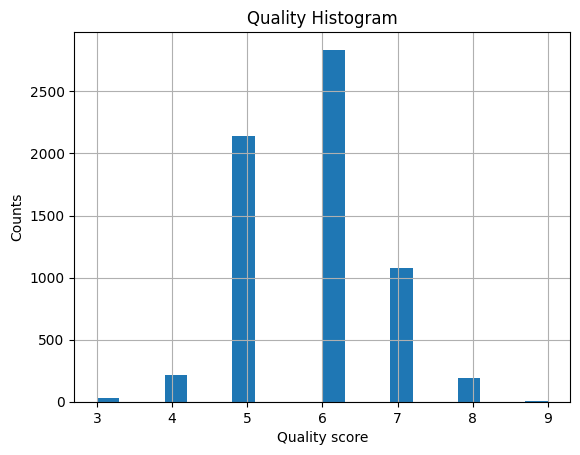

In [89]:
plt.hist(df['quality'], bins=20)
plt.title(f'Quality Histogram')
plt.xlabel(f'Quality score')
plt.ylabel('Counts')
plt.grid()
plt.show()

The quality is not balanced because the most dominating values are 5s and 6s. If the quality was balanced then all the quality scores would have approximately the same counts.

#Which wine has better quality?

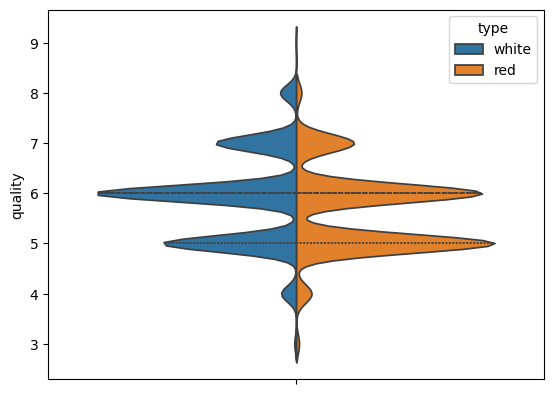

In [90]:
sns.violinplot(df, y='quality', split=True, hue='type', inner="quart")
plt.show()

As it can be seen from the violinplot, the type of wine does not affect its quality, so there is not a better type of wine. In both types the median value is the same, while also both types of wine follow the almost the same quality distribution.

#Does sweeter wine has better quality?

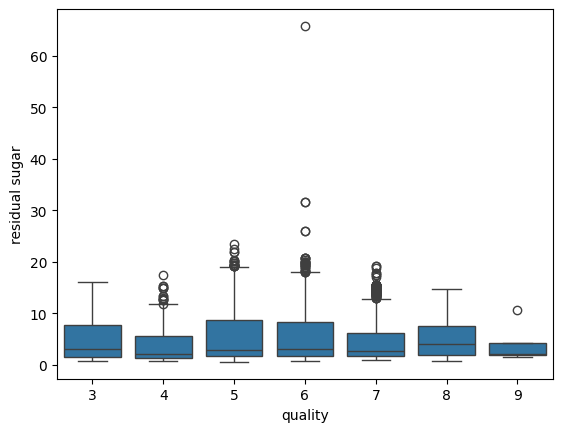

In [91]:
sns.boxplot(df, y='residual sugar', x = 'quality')
plt.show()

The boxplot shows almost the same residual sugar median for all the available qualities, with some outliers in the 4,5,6,7 quality scores. This means that sweeter wine hasn't have better quality than more dry wine. Another way to show this, is to show the correlation between the residual sugars and the quality score.

In [92]:
print(df['residual sugar'].corr(df['quality']))

-0.036824778601522085


The correlation value is almost 0. This means that there is no correlation between residual sugars and the quality of the wine, so sweeter wine has no better quality.

#Covert wine types into numerical values

In [93]:
df['type'] = df['type'].map({'white': 0, 'red': 1})

#Convert dataframe into numpy arrays

In [94]:
input_df = df.drop(columns=['quality'])
targets_df = df['quality']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((6497, 12), (6497,))

#Split to train-test

In [95]:
seed = 0
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 12), (5847,), (650, 12), (650,))

#Create, train model

In [96]:
model = DecisionTreeRegressor(random_state=seed)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

#Predict and get MAE

In [97]:
y_pred = model.predict(x_test)

MAE = round(mean_absolute_error(y_test, y_pred), 3)
MAE

0.448

#Repeat with different seeds

In [98]:
test_size = 0.1
MAEs = []
for i in range (0, 10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=i)

  model = DecisionTreeRegressor(random_state=seed)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  MAEs.append(round(mean_absolute_error(y_test, y_pred), 3))


#Get mean and std of the MAEs

In [99]:
MAEs = np.array(MAEs)
print(f'The mean of the MAEs on the last 10 runs is: {round(np.mean(MAEs),3)}')
print(f'The std of the MAEs on the last 10 runs is: {round(np.std(MAEs),3)}')

The mean of the MAEs on the last 10 runs is: 0.466
The std of the MAEs on the last 10 runs is: 0.027


Using the mean and the std of the 10 runs we can conclude how stable the model is. The more runs with different seeds, the better it is. Using this model to predict the quality of the wine, we can expect an error of 0.466±0.027 in its predictions.

#Split train set into train-validation

In [100]:
seed = 0
test_size = 0.2

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4677, 12), (4677,), (650, 12), (650,))

In [101]:
parameters = {'criterion': ('squared_error', 'friedman_mse'),
              'max_depth': (None, 3),
              'max_features': (None, 'sqrt'),
              'ccp_alpha': (0, 0.01)
              }

In [102]:
for parameter in ParameterGrid(parameters):
  print(parameter)

{'ccp_alpha': 0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None}
{'ccp_alpha': 0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt'}
{'ccp_alpha': 0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': None}
{'ccp_alpha': 0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt'}
{'ccp_alpha': 0, 'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None}
{'ccp_alpha': 0, 'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 'sqrt'}
{'ccp_alpha': 0, 'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': None}
{'ccp_alpha': 0, 'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'sqrt'}
{'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None}
{'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt'}
{'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': None}
{'ccp_alpha': 0.01, 'criterion':

In [103]:
matrix = []

for parameter in ParameterGrid(parameters):

  row = []

  #create model
  model = DecisionTreeRegressor(criterion = parameter['criterion'], max_depth = parameter['max_depth'],
                                 max_features = parameter['max_features'], ccp_alpha = parameter['ccp_alpha'], random_state = seed)

  row.extend((parameter['criterion'], parameter['max_depth'], parameter['max_features'], parameter['ccp_alpha']))

  #fit model
  model.fit(x_train, y_train)

  #predict validation data
  y_pred = model.predict(x_validate)

  #append validation MAE
  row.append(round(mean_absolute_error(y_validate, y_pred), 3))

  #predict train data
  y_pred = model.predict(x_train)

  #append train accuracy percentage
  row.append(round(mean_absolute_error(y_train, y_pred), 3))

  matrix.append(row)

#create accuracies dataframe
MAEs = pd.DataFrame(matrix, columns = [*parameters, 'validation set MAE', 'train set MAE'])

MAEs

,criterion,max_depth,max_features,ccp_alpha,validation set MAE,train set MAE
0,squared_error,NaN,None,0.00,0.507,0.000
1,squared_error,NaN,sqrt,0.00,0.520,0.000
2,squared_error,3.0,None,0.00,0.609,0.585
3,squared_error,3.0,sqrt,0.00,0.649,0.652
4,friedman_mse,NaN,None,0.00,0.491,0.000
5,friedman_mse,NaN,sqrt,0.00,0.520,0.000
6,friedman_mse,3.0,None,0.00,0.609,0.585
7,friedman_mse,3.0,sqrt,0.00,0.649,0.652
8,squared_error,NaN,None,0.01,0.626,0.600
9,squared_error,NaN,sqrt,0.01,0.633,0.619


#Train or validation set for choosing hyperparameter

In order to fine-tune a model you must choose the right hyperparameters using the validation set. The validation set is data that the model has not seen during the training process and thus they act as test data. We can use this validation set to see which hyperparamaters gives us the best metric value(and therefore we have used the validation set on the training process) and then train the model on the new unseen data(test set).

#Splitting into original split

In [104]:
seed = 0
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 12), (5847,), (650, 12), (650,))

#Using gridsearch for fine-tuning

In [105]:
model = DecisionTreeRegressor(random_state=seed)

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", -1*grid_search.best_score_)

Best parameters found:  {'ccp_alpha': 0, 'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None}
Best cross-validation score:  0.4870872848612575


#Train,predict,get mae with best found parameters

In [106]:
model = DecisionTreeRegressor(random_state=0,  ccp_alpha=0,  criterion='friedman_mse',
                              max_depth=None, max_features=None)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

MAE = round(mean_absolute_error(y_test, y_pred), 3)
MAE

0.428

#Which is the best method?

Out of the 3 methods used, the best one is cross validation because in the first one(mean and std) the model isn't fine-tuned like in the rest of the methods, in the second one the model is fine-tuned in expense of some data, the validation set, unlike the cross-validation method which combines both of this methods. Cross-validation splits the data into *k* different folds and then trains-validates *k* different times for each parameter set. The result is the mean MAE of over all of the *k* folds, and it chooses the one with the best perfomance.

#Trying the same but with max_depth = 5

In [107]:
parameters = {'criterion': ('squared_error', 'friedman_mse'),
              'max_depth': ([5]),
              'max_features': (None, 'sqrt'),
              'ccp_alpha': (0, 0.01)
              }

In [108]:
model = DecisionTreeRegressor(random_state=seed)

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", -1*grid_search.best_score_)

Best parameters found:  {'ccp_alpha': 0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None}
Best cross-validation score:  0.5668091119767175


In [109]:
model = DecisionTreeRegressor(random_state=0,  ccp_alpha=0,  criterion='squared_error',
                              max_depth=5, max_features=None)
model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0, max_depth=5, random_state=0)

#Plot tree

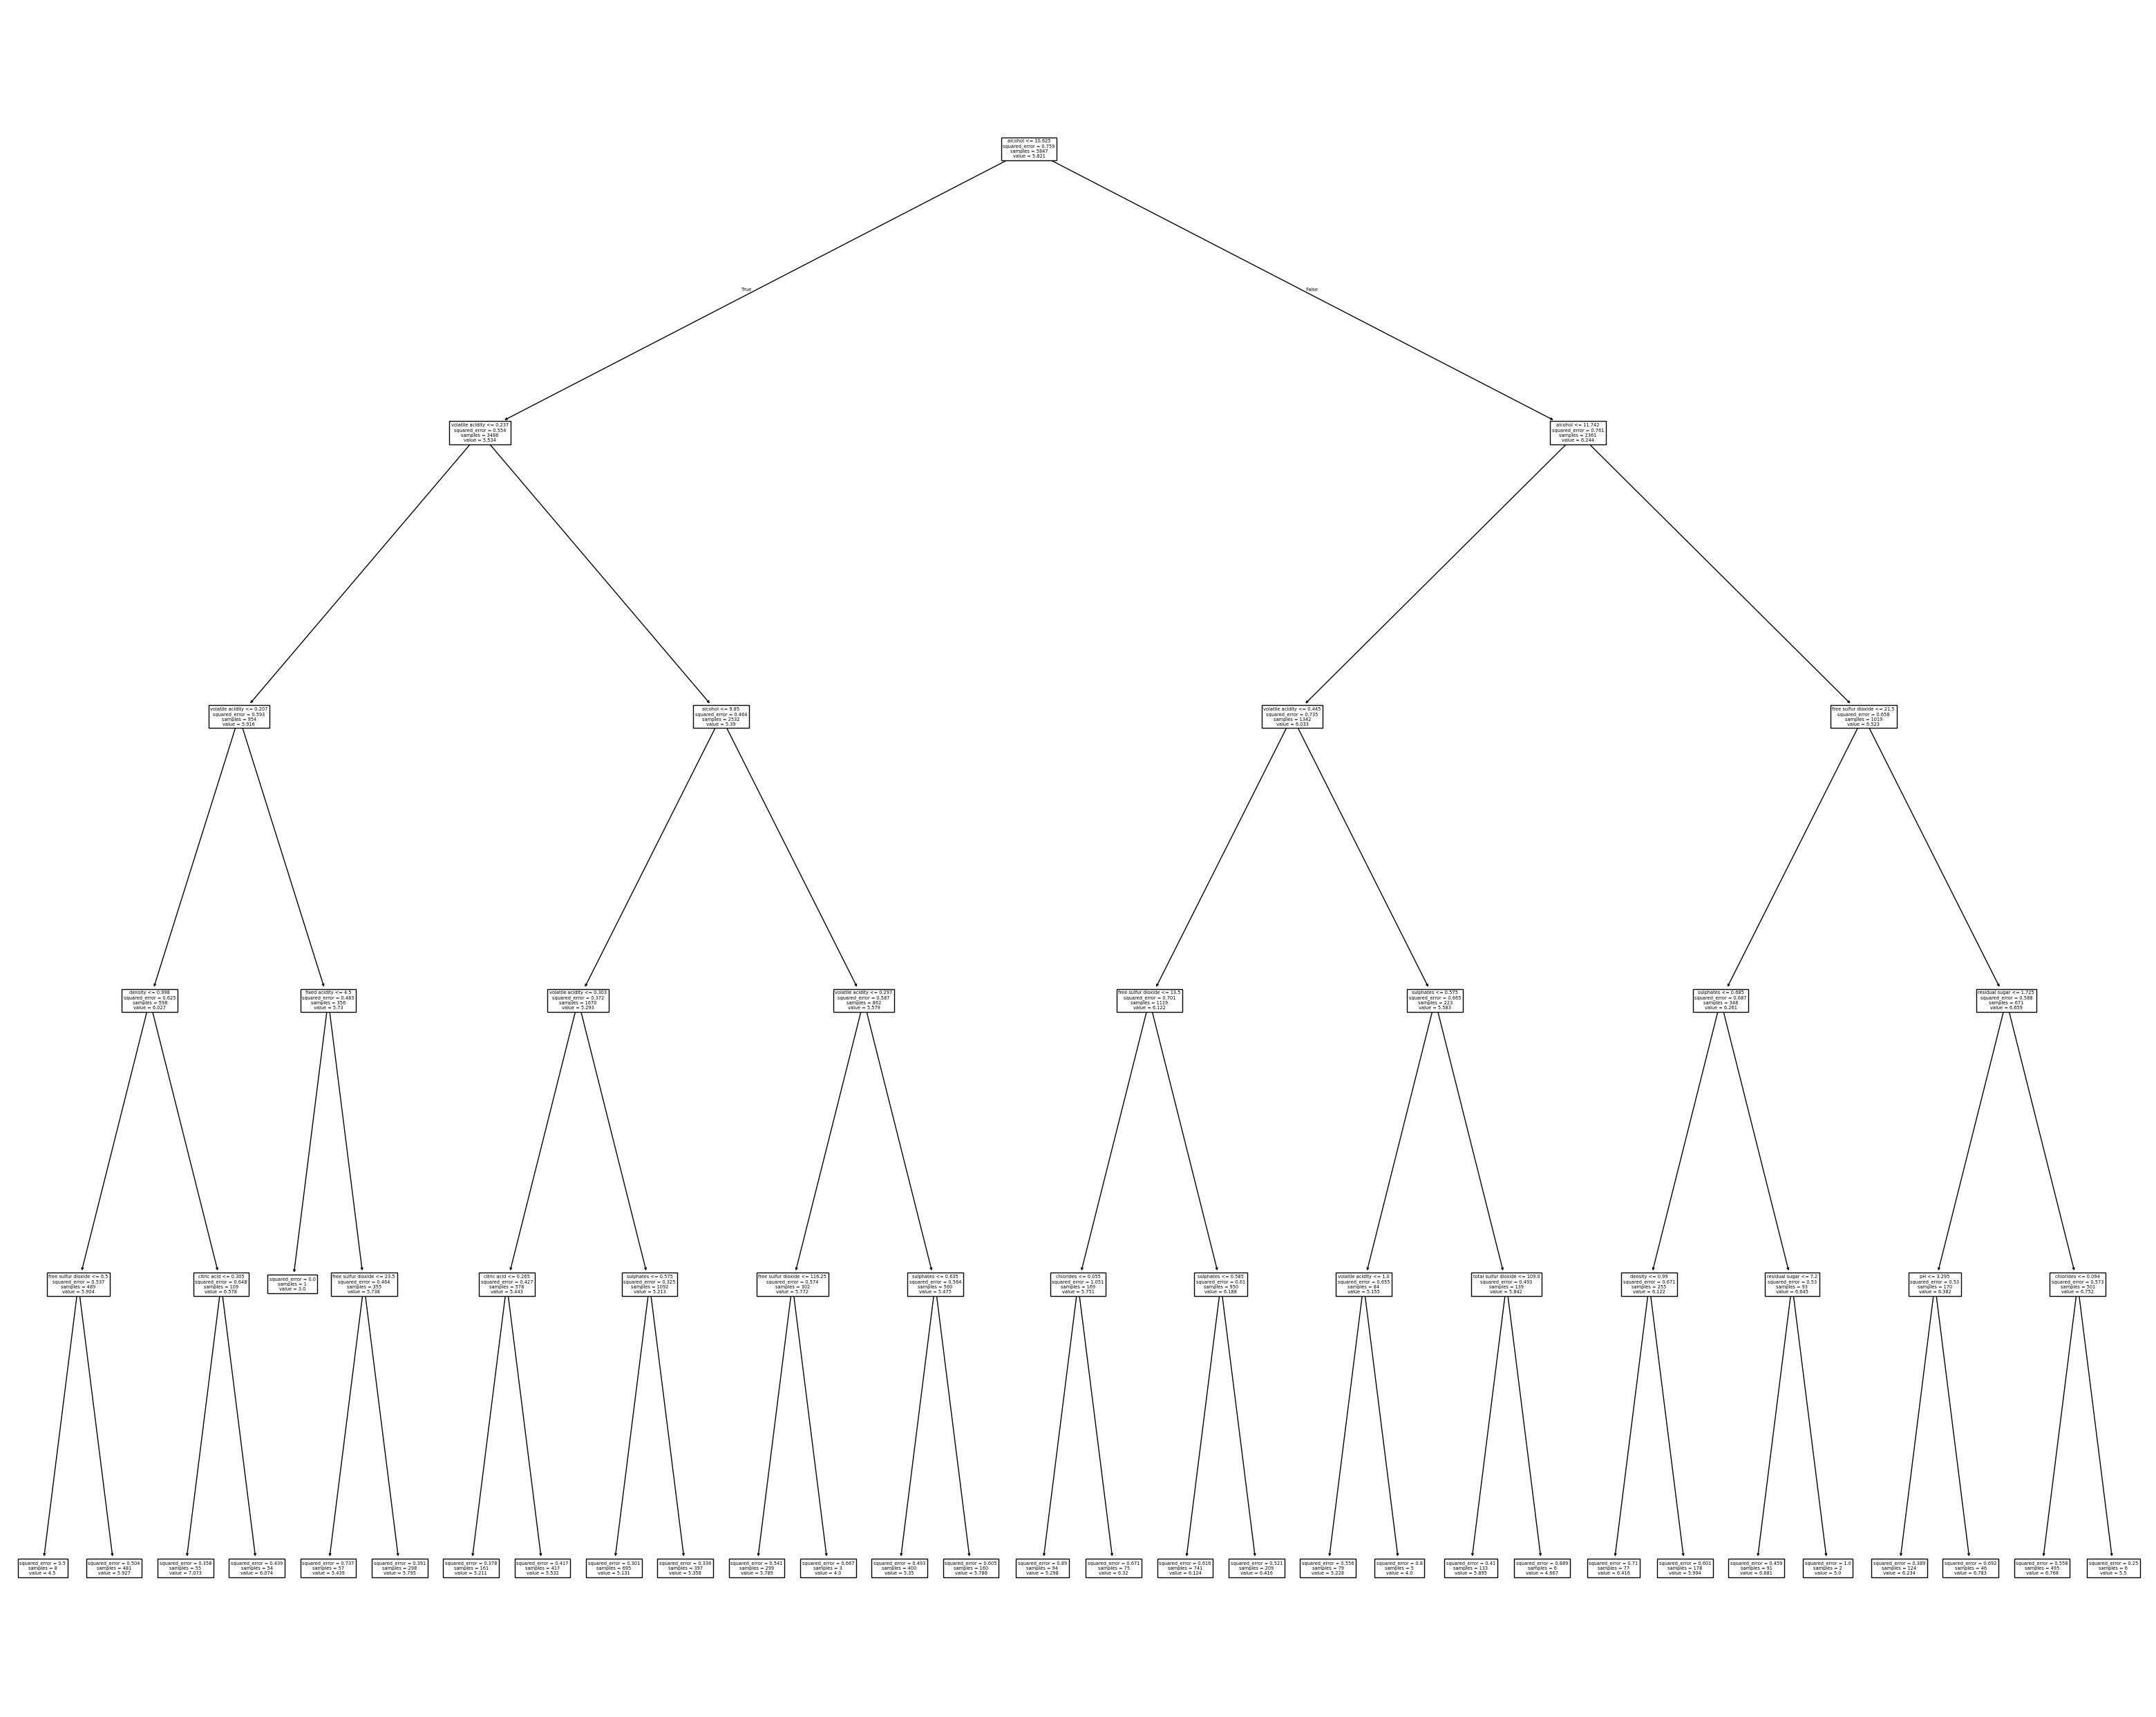

In [110]:
#making the image larger on google collab
f, ax = plt.subplots(1, figsize=(40,32))

plot_tree(model, feature_names = df.columns, filled = False)

plt.show()

*   The quality is good (over 7) if the wine has less than 10.625 alcohol percentage, has a volatile acidity under 0.207, density over 0.998, and citric acid under 0.305.
*    The quality is mediocre (from 5 to 7) if the alcohol level is over 11.742, or if its under 11.742 and has a volatile acidity under 1 or a tolal sulfur dioxide under 109. Also, if the alcohol percentage is under 10.625 and the free sulfur dioxide is in a range from 6.5 to 116.25.
*    The quality is not good (under 5) if the alcohol percentage is under 10.625 and the free sulfur dioxide is under 6.5 or over 116.25, or if the fixed acidity is under 4.5. Also, if the alcohol levels are over 10.625 and the volaile acidity is over 1 or the total sulfur dioxide is over 109.









#Feature importance

    Importance               Element
0     0.565452               alcohol
1     0.195446      volatile acidity
2     0.060075   free sulfur dioxide
3     0.058176             sulphates
4     0.033522             chlorides
5     0.031584               density
6     0.024716           citric acid
7     0.014468        residual sugar
8     0.006377                    pH
9     0.005465  total sulfur dioxide
10    0.004719         fixed acidity
11    0.000000                  type


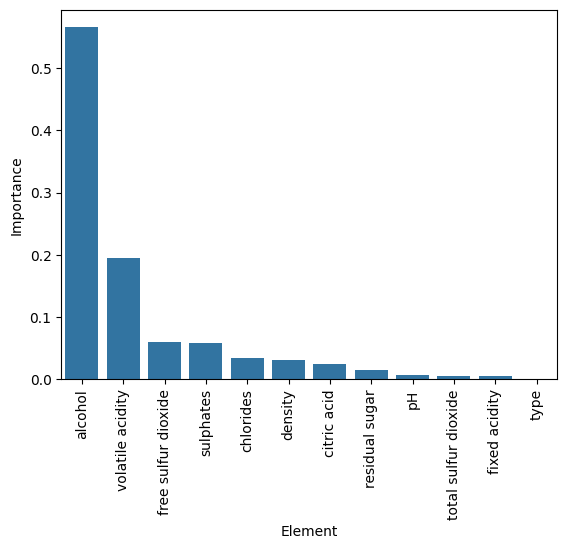

In [111]:
importance = model.feature_importances_

importance_df = pd.DataFrame({'Importance': importance, 'Element': df.columns[:].drop('quality')[:]})

importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(importance_df.reset_index(drop=True))

plt.xticks(rotation=90)

sns.barplot(data=importance_df, x='Element' , y='Importance')


plt.show()